In [212]:
import pandas as pd
import matplotlib.pyplot as plt


In [213]:
s21fe = pd.read_csv("dataset/samsung_s21fe-data.csv")
pixel6a = pd.read_csv("dataset/pixel_6a-data.csv")
a70 = pd.read_csv("dataset/samsung_a70-data.csv")
pixel4a = pd.read_csv("dataset/pixel_4a-data.csv")


converting a feature to date time


In [214]:
s21fe["timestamp"] = pd.to_datetime(s21fe["timestamp"])
pixel4a["timestamp"] = pd.to_datetime(pixel4a["timestamp"])
pixel6a["timestamp"] = pd.to_datetime(pixel6a["timestamp"])
a70["timestamp"] = pd.to_datetime(a70["timestamp"])


In [215]:
t1 = s21fe.iloc[0,0]
t2 = a70.iloc[0,0]
t3 = pixel4a.iloc[0,0]
t4 = pixel6a.iloc[0,0]

In [216]:
time1 = []
for index,row in s21fe.iterrows() :
    time1.append(pd.Timedelta(row['timestamp']-t1,unit="minutes"))
s21fe["time_elasped"] = time1

In [217]:
time2 = []
for index,row in a70.iterrows() :
    time2.append(pd.Timedelta(row['timestamp']-t2,unit="minutes"))
a70["time_elasped"] = time2

In [218]:
time3 = []
for index,row in pixel4a.iterrows() :
    time3.append(pd.Timedelta(row['timestamp']-t3,unit="minutes"))
pixel4a["time_elasped"] = time3

In [219]:
time4 = []
for index,row in pixel6a.iterrows() :
    time4.append(pd.Timedelta(row['timestamp']-t4,unit="minutes"))
pixel6a["time_elasped"] = time4

In [220]:
pixel6a.tail()

,timestamp,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh),battery_technology,time_elasped
3327,2023-04-14 21:27:17.044,4.436,373,1.657955,100,33.1,4422,4410,Li-ion,0 days 01:57:08.560000
3328,2023-04-14 21:27:18.091,4.436,370,1.641320,100,33.1,4422,4410,Li-ion,0 days 01:57:09.607000
3329,2023-04-14 21:27:19.135,4.436,374,1.659339,100,33.1,4422,4410,Li-ion,0 days 01:57:10.651000
3330,2023-04-14 21:27:20.173,4.436,388,1.724495,100,33.1,4424,4410,Li-ion,0 days 01:57:11.689000
3331,2023-04-14 21:27:21.195,4.436,377,1.673202,100,33.1,4424,4410,Li-ion,0 days 01:57:12.711000


In [221]:
s21fe.tail()

,timestamp,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh),battery_technology,time_elasped
4459,2023-04-14 14:30:25.580,4.4,673,2.9612,100,37.7,4132.0,4370,Li-ion,0 days 01:24:39.734000
4460,2023-04-14 14:30:26.603,4.4,659,2.8996,100,37.7,4132.0,4370,Li-ion,0 days 01:24:40.757000
4461,2023-04-14 14:30:27.628,4.4,665,2.9260,100,37.7,4132.0,4370,Li-ion,0 days 01:24:41.782000
4462,2023-04-14 14:30:28.663,4.4,664,2.9216,100,37.7,4132.0,4370,Li-ion,0 days 01:24:42.817000
4463,2023-04-14 14:30:29.695,4.4,661,2.9084,100,37.7,4132.0,4370,Li-ion,0 days 01:24:43.849000


Full battery data count


In [222]:
s21fe.loc[s21fe["battery_percent"] == 100].shape


(143, 10)

In [223]:
pixel6a.loc[pixel6a["battery_percent"] == 100].shape


(303, 10)

In [224]:
a70.loc[a70["battery_percent"] == 100].shape


(7, 10)

In [225]:
pixel4a.loc[pixel4a["battery_percent"] == 100].shape


(97, 10)

S21 FE Time vs Current Graph


Text(0, 0.5, 'Current (mA)')

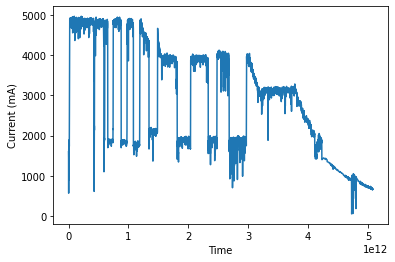

In [226]:
x = s21fe["time_elasped"]
y = s21fe["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Current (mA)")


S21 FE Time vs Voltage Graph


Text(0, 0.5, 'Voltage(V)')

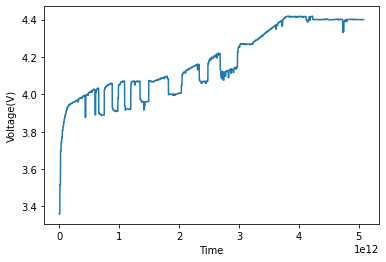

In [227]:
x = s21fe["time_elasped"]
y = s21fe["voltage(V)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Voltage(V)")


S21 FE Time vs Power Graph


Text(0, 0.5, 'Power(W)')

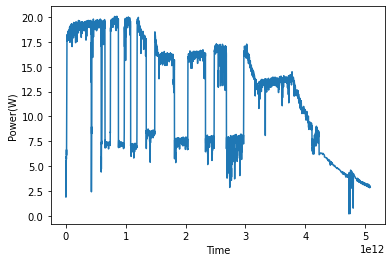

In [228]:
x = s21fe["time_elasped"]
y = s21fe["power(W)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Power(W)")


S21 FE Time vs Temperature Graph


Text(0, 0.5, 'temperature(Celsius)')

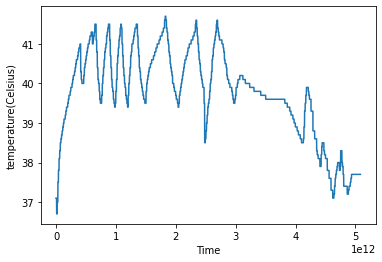

In [229]:
x = s21fe["time_elasped"]
y = s21fe["battery_temperature(Celsius)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("temperature(Celsius)")


S21 FE Time vs SOC Graph


Text(0, 0.5, 'Battery level')

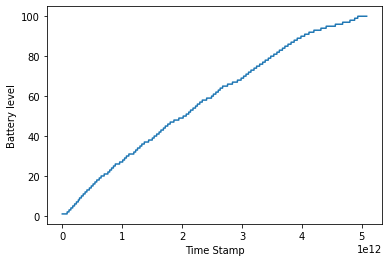

In [230]:
x = s21fe["time_elasped"]
y = s21fe["battery_percent"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Battery level")


Samsung A70 Time vs Current Graph


Text(0, 0.5, 'Current (mA)')

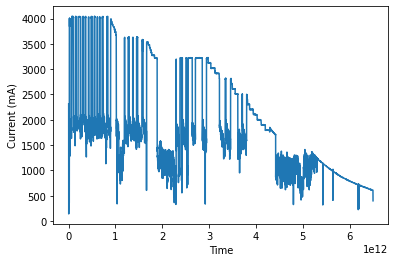

In [231]:
x = a70["time_elasped"]
y = a70["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Current (mA)")


Pixel 6A Time vs Current Graph


Text(0, 0.5, 'Current (mA)')

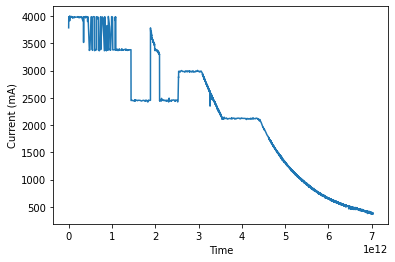

In [232]:
x = pixel6a["time_elasped"]
y = pixel6a["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Current (mA)")


Shape of all four phones


In [233]:
pixel6a.shape


(3332, 10)

In [234]:
a70.shape


(4686, 10)

In [235]:
s21fe.shape


(4464, 10)

In [236]:
pixel4a.shape


(2889, 10)

Max temp the phone reached while charging


In [237]:
print("A70 Max Temp", a70["battery_temperature(Celsius)"].max())
print("S21FE Max Temp", s21fe["battery_temperature(Celsius)"].max())
print("Pixel 6A Max Temp", pixel6a["battery_temperature(Celsius)"].max())
print("Pixel 4A Max Temp", pixel4a["battery_temperature(Celsius)"].max())


A70 Max Temp 40.1
S21FE Max Temp 41.7
Pixel 6A Max Temp 42.7
Pixel 4A Max Temp 41.4


Correlation


In [238]:
pixel6a.corr()


,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.868765,-0.841552,0.961953,-0.725914,0.964408,NaN
current(mA),-0.868765,1.000000,0.998412,-0.943624,0.925130,-0.939750,NaN
power(W),-0.841552,0.998412,1.000000,-0.925999,0.938359,-0.921439,NaN
battery_percent,0.961953,-0.943624,-0.925999,1.000000,-0.817088,0.999553,NaN
battery_temperature(Celsius),-0.725914,0.925130,0.938359,-0.817088,1.000000,-0.812513,NaN
remaining_battery_charge(mAh),0.964408,-0.939750,-0.921439,0.999553,-0.812513,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
a70.corr()


,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,0.088772,0.143112,0.796245,0.622724,0.794243,NaN
current(mA),0.088772,1.000000,0.998250,-0.492034,0.179417,-0.497655,NaN
power(W),0.143112,0.998250,1.000000,-0.442711,0.222917,-0.448636,NaN
battery_percent,0.796245,-0.492034,-0.442711,1.000000,0.547542,0.999432,NaN
battery_temperature(Celsius),0.622724,0.179417,0.222917,0.547542,1.000000,0.532167,NaN
remaining_battery_charge(mAh),0.794243,-0.497655,-0.448636,0.999432,0.532167,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
s21fe.corr()


,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.387511,-0.311557,0.926127,-0.432842,0.926291,NaN
current(mA),-0.387511,1.000000,0.995779,-0.635516,0.411069,-0.636134,NaN
power(W),-0.311557,0.995779,1.000000,-0.569778,0.407685,-0.570358,NaN
battery_percent,0.926127,-0.635516,-0.569778,1.000000,-0.467203,0.999941,NaN
battery_temperature(Celsius),-0.432842,0.411069,0.407685,-0.467203,1.000000,-0.465893,NaN
remaining_battery_charge(mAh),0.926291,-0.636134,-0.570358,0.999941,-0.465893,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
pixel4a.corr()


,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.734010,-0.681379,0.954687,-0.485023,0.959233,NaN
current(mA),-0.734010,1.000000,0.996327,-0.849624,0.640539,-0.852406,NaN
power(W),-0.681379,0.996327,1.000000,-0.803863,0.668082,-0.807449,NaN
battery_percent,0.954687,-0.849624,-0.803863,1.000000,-0.447011,0.999495,NaN
battery_temperature(Celsius),-0.485023,0.640539,0.668082,-0.447011,1.000000,-0.467295,NaN
remaining_battery_charge(mAh),0.959233,-0.852406,-0.807449,0.999495,-0.467295,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN
